# El juego de la vida 

El universo del juego de la vida es una rejilla ortogonal bidimensional infinita de celdas cuadradas, cada una de las cuales está en uno de dos estados posibles, vivo o muerto. Cada célula interactúa con sus ocho vecinos, que son las celdas que están directamente en posición horizontal, vertical o digonal. En cada paso en el tiempo, ocurren las siguientes transiciones:
1. Muere cualquier célula viva con menos de dos vecinos vivos, debido a necesidades a la falta de población.
2. Muere cualquier célula viva con más de tres vecinos vivos, debido a sobrepoblación.
3. Cualquier célula viva con dos o tres vecinos vivos vive, sin cambios, para la próxima generación.
4. Cualquier célula viva muerta con exactamente tres vecinos se convierte en una célula viva.

In [9]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

<IPython.core.display.Javascript object>


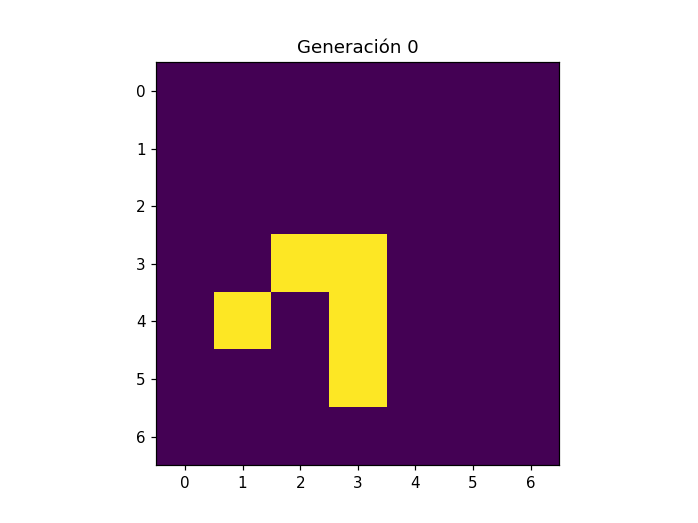

In [10]:
fig = plt.figure()
N=7;#Tamaño de la rejilla
K=0.4;#Porcentaje de la población inicial
n=0;#Contador
#Po=(np.random.rand(N,N)<=K)*1;#Creación de la población inicial
Po=np.zeros((N,N));
Po[4,1]=1;
Po[3,2]=1;
Po[3,3]=1;
Po[4,3]=1;
Po[5,3]=1;

def filtro(A):
    #h=np.ones((3,3));#Kernel
    h=np.array([[1,1,1],[1,0,1],[1,1,1]]);
    F=convolve2d(A,h,mode="same");#Convolución entre la matriz de población y el Kernel
    return F

def condiciones(A):
    F=filtro(A);
    C1=1*((F==2)+(F==3))*A; #Condiciones de células vivas
    C2=1*((F==3))*(1-A); #Condiciones de células muertas
    A=C1+C2;
    return A

def poblacion():
    global A,Po,n
    if(n==0):
        A=Po;
        n=1;
    else:
        n=n+1;
        A=condiciones(A);
    return A
im = plt.imshow(poblacion(), animated=True)

def updatefig(i):
    global n
    label = 'Generación {0}'.format(i)
    if(n>i):
        n=0;
    im.set_array(poblacion())
    plt.title(label)
    return im

ani = animation.FuncAnimation(fig, updatefig,frames=np.arange(0,10), interval=1000, repeat=True)
plt.show()
